In [1]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("lego.csv")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight_Kg,Unique_Pieces,Availability,Size
0,10859,My First Ladybird,DUPLO,6,4.99,16.00,2018,Ages_1.5-3,9,NaN,Box,NaN,5,Retail,Large
1,10860,My First Race Car,DUPLO,6,4.99,9.45,2018,Ages_1.5-4,9,NaN,Box,0.13,6,Retail,Large
2,10862,My First Celebration,DUPLO,41,14.99,39.89,2018,Ages_1.5-5,9,NaN,Box,NaN,18,NaN,Large
3,10864,Large Playground Brick Box,DUPLO,71,49.99,56.69,2018,Ages_2-5,32,2.0,Plastic box,1.41,49,NaN,Large
4,10867,Farmers' Market,DUPLO,26,19.99,36.99,2018,Ages_2-5,9,3.0,Box,NaN,18,NaN,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,60251,Monster Truck,City,55,9.99,8.99,2020,Ages_5+,32,1.0,Box,0.14,34,Retail,Small
71,60252,Construction Bulldozer,City,126,19.99,15.99,2020,Ages_4+,84,2.0,Box,0.35,81,Retail,Small
72,60258,Tuning Workshop,City,897,99.99,99.99,2020,Ages_6+,389,7.0,Box,1.63,411,Retail,Small
73,60266,Ocean Exploration Ship,City,745,149.99,149.99,2020,Ages_7+,229,8.0,Box,2.28,314,Retail,Small


In [23]:
df.isna().sum()

Item_Number       0
Set_Name          0
Theme             0
Pieces            0
Price             0
Amazon_Price      0
Year              0
Ages              0
Pages             0
Minifigures      10
Packaging         7
Weight_Kg        36
Unique_Pieces     0
Availability     13
Size              0
dtype: int64

In [24]:
df= df.drop(columns=["Item_Number","Minifigures","Packaging","Weight_Kg","Availability","Year","Set_Name","Theme","Ages","Size"])


In [25]:
df.corr()["Amazon_Price"]

Pieces           0.668246
Price            0.822550
Amazon_Price     1.000000
Pages            0.615498
Unique_Pieces    0.664319
Name: Amazon_Price, dtype: float64

In [26]:
df

,Pieces,Price,Amazon_Price,Pages,Unique_Pieces
0,6,4.99,16.00,9,5
1,6,4.99,9.45,9,6
2,41,14.99,39.89,9,18
3,71,49.99,56.69,32,49
4,26,19.99,36.99,9,18
...,...,...,...,...,...
70,55,9.99,8.99,32,34
71,126,19.99,15.99,84,81
72,897,99.99,99.99,389,411
73,745,149.99,149.99,229,314


In [28]:
import matplotlib.pyplot as plt

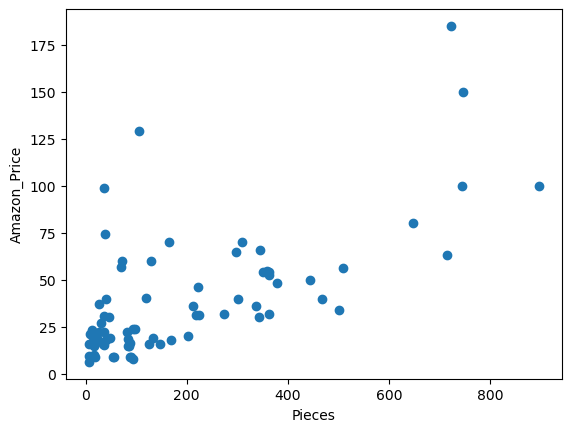

In [29]:
plt.scatter(df['Pieces'], df['Amazon_Price'])
plt.xlabel("Pieces")
plt.ylabel("Amazon_Price")
plt.show()

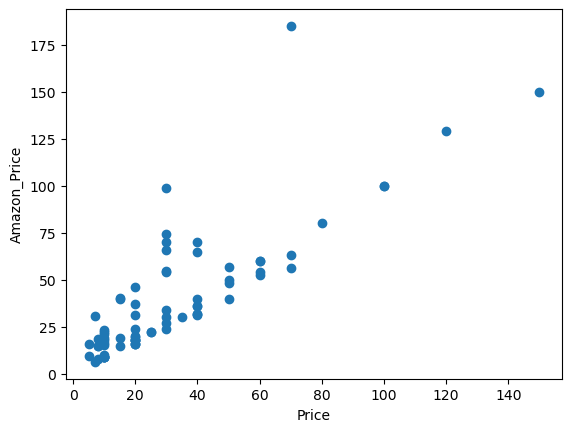

In [30]:
plt.scatter(df['Price'], df['Amazon_Price'])
plt.xlabel("Price")
plt.ylabel("Amazon_Price")
plt.show()

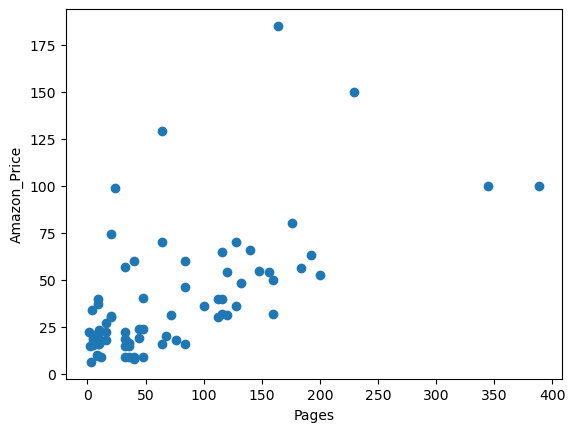

In [31]:
plt.scatter(df['Pages'], df['Amazon_Price'])
plt.xlabel("Pages")
plt.ylabel("Amazon_Price")
plt.show()

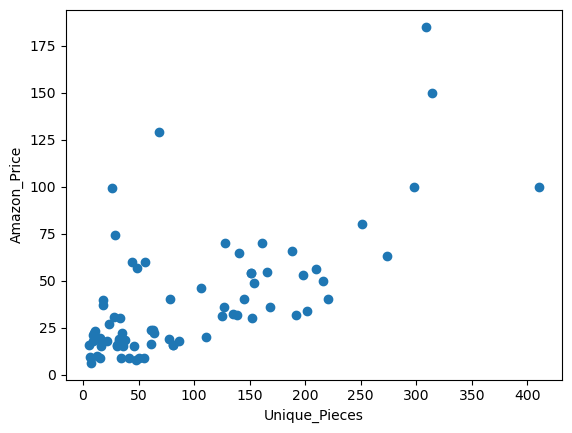

In [32]:
plt.scatter(df['Unique_Pieces'], df['Amazon_Price'])
plt.xlabel("Unique_Pieces")
plt.ylabel("Amazon_Price")
plt.show()

In [33]:
df_np = np.array(df)

In [40]:
x_train,y_train = df_np[:,[0,1,3,4]],df_np[:,-3]

In [41]:
x_train.shape, y_train.shape

((75, 4), (75,))

In [46]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression().fit(x_train,y_train)
sklearn_y_predictions = sklearn_model.predict(x_train)

In [47]:
sklearn_y_predictions

array([  9.37898181,   9.55853212,  20.60913059,  55.60100626,
        25.59183702,  15.5272991 ,  27.90769094, 120.25918401,
        35.29554128,  34.2112508 ,  23.04158076,  25.23416454,
        27.65384731,  25.1744763 ,  14.92426596,  63.01800054,
        14.95296275,  26.48346646,  34.33976832,  12.45913511,
        34.91195225,  21.64500587,  15.29140241,  40.61803947,
        58.06824592,  24.61844909,  27.61187719,  37.99871612,
        91.9680831 ,  61.00501852,  13.25480789,  13.64681368,
        24.75420212,  53.56370354,  81.86434543,  68.71014   ,
        32.6767043 ,  55.19677517,  14.52112402,  14.15360664,
        55.33408877,  15.38341463,  18.81738873,  18.96546201,
        18.83526945,  31.08704901,  47.7615184 ,  90.55721541,
        39.43407139,  61.46214488,  13.34722243,  19.02648278,
        46.94602978,  41.94678498,  39.34459097,  20.22594136,
        54.2868178 ,  47.50414164,  27.02306898,  74.88654266,
        61.15796168,  17.05142938,  27.16752411,  36.64

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(12.021398045882517, 329.1833695633022)

In [51]:
predictions_df = pd.DataFrame({'Pieces': df['Pieces'],
                               'Price': df['Price'],
                               'Pages': df['Pages'],
                               'Unique_Pieces': df['Unique_Pieces'],
                               'Amazon_Price': df['Amazon_Price'],
                               'Sklearn Amazon Predictions':sklearn_y_predictions})
predictions_df

,Pieces,Price,Pages,Unique_Pieces,Amazon_Price,Sklearn Amazon Predictions
0,6,4.99,9,5,16.00,9.378982
1,6,4.99,9,6,9.45,9.558532
2,41,14.99,9,18,39.89,20.609131
3,71,49.99,32,49,56.69,55.601006
4,26,19.99,9,18,36.99,25.591837
...,...,...,...,...,...,...
70,55,9.99,32,34,8.99,15.283652
71,126,19.99,84,81,15.99,24.719020
72,897,99.99,389,411,99.99,104.200835
73,745,149.99,229,314,149.99,159.128110


In [53]:
def get_predictions(model, x):
    (n, p_minusone) = x.shape
    p = p_minusone +1
    new_x = np.ones(shape= (n,p))
    new_x[:, 1:] = x
    return np.dot(new_x, model)


In [54]:
from numpy.linalg import inv

def get_best_model(X, y):

    (n, p_minus_one) = X.shape
    p = p_minus_one + 1

    new_X = np.ones(shape=(n, p))
    new_X[:, 1:] = X

    return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)

In [56]:
best_model = get_best_model(x_train, y_train)
predictions_df['Best Predictions'] = get_predictions(best_model, x_train)
predictions_df

,Pieces,Price,Pages,Unique_Pieces,Amazon_Price,Sklearn Amazon Predictions,Best Predictions
0,6,4.99,9,5,16.00,9.378982,9.378982
1,6,4.99,9,6,9.45,9.558532,9.558532
2,41,14.99,9,18,39.89,20.609131,20.609131
3,71,49.99,32,49,56.69,55.601006,55.601006
4,26,19.99,9,18,36.99,25.591837,25.591837
...,...,...,...,...,...,...,...
70,55,9.99,32,34,8.99,15.283652,15.283652
71,126,19.99,84,81,15.99,24.719020,24.719020
72,897,99.99,389,411,99.99,104.200835,104.200835
73,745,149.99,229,314,149.99,159.128110,159.128110
